### Getting start

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GenAI-CUEE/EE208-Introduction-to-programming-for-EE/blob/master/L4_Runtime_measurement/Profiling_w_libraries.ipynb)

- [Installing packages](#installing-packages)
- [Knowing your data](#reading-input-image)
- [Define window sliding algorithm](#define-the-kernel-and-2d-convolution-operation)

Here we present 3 approaches to measure the runtime perfromance

- [Time difference](#1-measure-the-time-difference)
    - [Time library](#11-timetime)
    - [cProfile library](#12-cprofile)


### Installing packages

In [1]:
! python -m pip install -U matplotlib
! pip install PIL, numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ERROR: Invalid requirement: 'PIL,'


In [2]:
import numpy as np
import time 
from datetime import timedelta 
from PIL import Image
import matplotlib.pyplot as plt
 

## Reading input image

We download a kitten image from https://github.com/JoshVarty/ImageClassification/tree/master ... 
and use an image from only one channel. 

(np.float64(-0.5), np.float64(498.5), np.float64(409.5), np.float64(-0.5))

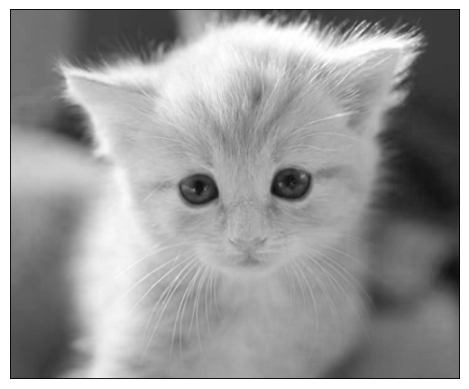

In [3]:
readimage          = Image.open("kitten_00000027.png") #These two lines

newsize    =  (499, 410) # readimage.size

resize      = readimage.resize(newsize)
im_arr      = np.array(resize)
image_red   = im_arr[:,:,0]/255

h, w  = image_red.shape
plt.imshow(image_red, cmap='gray', vmin=0, vmax=1)
plt.axis("off")

## Define the kernel and Conv2D operation

(np.float64(-0.5), np.float64(496.5), np.float64(407.5), np.float64(-0.5))

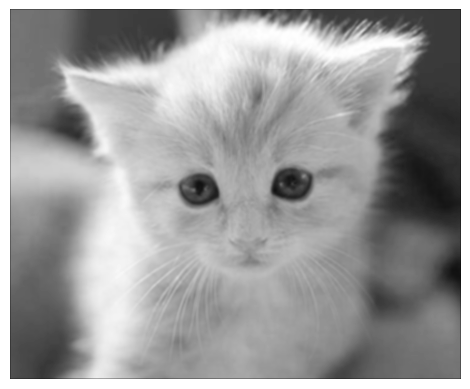

In [4]:
# Define a kernel

kernel_size = 3
simple_kernel = np.ones((3,3))/9

def window_sliding(image, kernel):
    ky, kx = kernel.shape 
    y, x = image.shape
    y = y - ky + 1
    x = x - kx + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+ky, j:j+kx]*kernel) 

    return new_image 

newimage  = window_sliding(image_red, simple_kernel) 

plt.imshow(newimage, cmap='gray', vmin=0, vmax=1) 
plt.axis("off")

## Measure the time difference

Time difference can be measured directly through the computer system time or using native tools, e.g., time and cProfile.

### Time.time()

In [5]:
### Start 
starttime = time.perf_counter() 

newimage  = window_sliding(image_red, simple_kernel) 

### Stop 
stoptime = time.perf_counter()
duration  = timedelta(seconds=stoptime-starttime) 
print('Job took: %.3f ms' % (duration.microseconds/1000))  

Job took: 379.701 ms


Verify image size

In [22]:
timediff_ms_list = []

kernel_size_ = 3
simple_kernel   = np.ones((kernel_size_,kernel_size_))/(kernel_size_**2)

image_size_list = [32, 64, 128, 256]

for image_size in  image_size_list:

    newsize = (image_size, image_size)

    resize      = readimage.resize(newsize)
    im_arr      = np.array(resize)
    image_red   = im_arr[:,:,0]/255

    ### Start 
    starttime = time.perf_counter() 

    newimage  = window_sliding(image_red, simple_kernel) 

    ### Stop 
    stoptime = time.perf_counter()
    duration  = timedelta(seconds=stoptime-starttime) 
    timediff_ms_ = (duration.microseconds/1000)

    timediff_ms_list.append(timediff_ms_)

    print('Job took: %.3f ms' % (timediff_ms_))  


Job took: 6.691 ms
Job took: 8.256 ms
Job took: 30.448 ms
Job took: 118.950 ms
